# 미래를 예측하는 방법
## 시계열예측

남들이 모르는 미래를 알 수 있는 엄청난 초능력이 있다면, 얼마나 좋을까요? 주가의 흐름을 미리 알거나 복권번호를 미리 알 수 있다면,
돈을 벌 수 있을텐데요. 그외에도 사고를 미리 예측한다면, 예방에도 도움을 줄 수 있을 것이다.

이번에 주가의 변화를 바탕으로 미래의 주가 변동을 예측해보자.

미래의 예측값에 대한 신뢰도를 높이기 위해서는
1. 과거의 데이터에서 일정한 패턴을 발견할 수 있고
2. 과거의 패턴이 미래에도 동일하게 반복되야 한다.

이러한 전제가 성립하는 데이터를 안정적 데이터라고 하며, 시계열데이터라면, 과거로 부터 학습한 패턴이 미래에도 일어날 것으로 신뢰할 수 있다.

Stationary, 안정성에 대한 조건을 알아보자.

조건 1. 이동 평균이 같아야 한다.
- 데이터를 일정 구간으로 나누었을 때 그 구간이 갖는 평균이 같아야 한다.

조건 2. 이동 표준편차가 같아야 한다.
- 데이터를 일정 구간으로 나누었을 때 그 구간이 갖는 표준편차가 같아야 한다.

조건 3. 자기공분산이 같아야 한다.
- t시점과 (t-1)시점의 공분산과 t시점과 (t+1)시점의 공분산이 같아야 한다.

# 시계열 예측 해보자.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv('./data/daily-min-temperatures.csv') 
print(type(df))
df.head()

<class 'pandas.core.frame.DataFrame'>


,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


pandas 데이터프레임의 자료형으로 불러왔다.
우리가 실습하고자하는 시계열분석에는 시간을 인덱스로하는 시리즈 데이터가 필요하다. (Time series)

In [7]:
df = pd.read_csv('./data/daily-min-temperatures.csv', index_col='Date', parse_dates=True) 
print(type(df))
df.head()

<class 'pandas.core.frame.DataFrame'>


,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


시간컬럼을 인덱스를 선언해서 다시 할당해줬는데도, 데이터프레임으로 나온다.

In [8]:
ts1 = df['Temp']  # 우선은 데이터 확인용이니 time series 의 이니셜을 따서 'ts'라고 이름 붙여줍시다!
print(type(ts1))
ts1.head()

<class 'pandas.core.series.Series'>


Date
1981-01-01    20.7
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
Name: Temp, dtype: float64

시계열 데이터(time series)의 변수 ts1을 만들었다.

시각화 해볼까요?

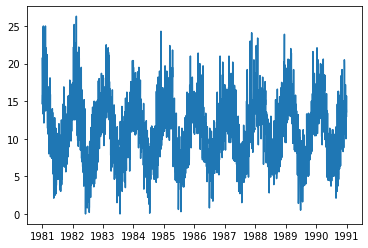

In [9]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 13, 6    # matlab 차트의 기본 크기를 13, 6으로 지정해 줍니다.

plt.plot(ts1)

결측치가 있는지 볼까요?

In [10]:
ts1[ts1.isna()]  # 시계열(Time Series)에서 결측치가 있는 부분만 Series로 출력합니다.

Series([], Name: Temp, dtype: float64)

결측치는 존재하지 않습니다.

Series([], Name: Temp, dtype: float64)


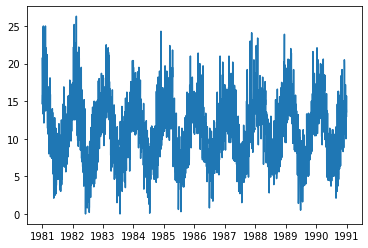

In [11]:
# 결측치가 있다면 이를 보간합니다. 보간 기준은 time을 선택합니다. 
ts1=ts1.interpolate(method='time')

# 보간 이후 결측치(NaN) 유무를 다시 확인합니다.
print(ts1[ts1.isna()])

# 다시 그래프를 확인해봅시다!
plt.plot(ts1)

안정적인 데이터인지 확인하고자 
통계적 특성을 살펴봅시다.

먼저 이동평균과 표준편차 중 이동평균입니다.

In [12]:
def plot_rolling_statistics(timeseries, window=12):
    
    rolmean = timeseries.rolling(window=window).mean()  # 이동평균 시계열
    rolstd = timeseries.rolling(window=window).std()    # 이동표준편차 시계열

     # 원본시계열, 이동평균, 이동표준편차를 plot으로 시각화해 본다.
    orig = plt.plot(timeseries, color='blue',label='Original')    
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

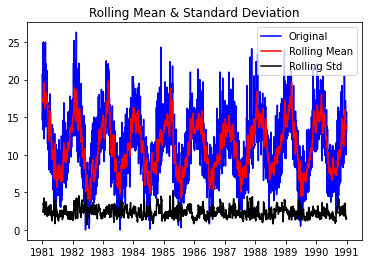

In [13]:
plot_rolling_statistics(ts1, window=12)

In [14]:
dataset_filepath = './data/airline-passengers.csv'
df = pd.read_csv(dataset_filepath, index_col='Month', parse_dates=True).fillna(0)  
print(type(df))
df.head()

<class 'pandas.core.frame.DataFrame'>


,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


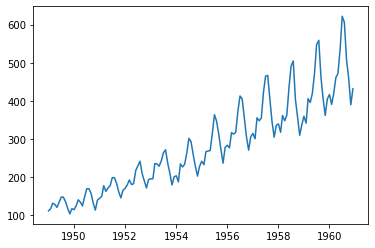

In [15]:
ts2 = df['Passengers']
plt.plot(ts2)

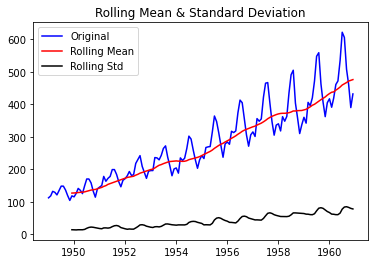

In [16]:
plot_rolling_statistics(ts2, window=12)

기온변화에 대한 ts1과 비행기 승객에 대한 ts2의 이동평균과 이동표준편차를 구해보고 시각화해봤다.

이런 시계열 데이터가 stationary한지 체크하는 통계적인 방법 중에 하나 인
Augmented Dickey-Fuller Test를 알아보자.

1. 주어진 시계열이 안정적이지 않다는 귀무가설(Null hypothesis)를 세우고
2. 통계적 가설 검정 과정을 통해 이 귀무가설이 기각될 경우에
3. 이 시계열이 안정적이다 라는 대립가설(Alternative hypothesis)를 채택한다.

귀무가설(h0)과 대립가설(h1)
ex) 백신의 효과를 검정할 때, h0 : 백신의 효과가 없다. h1 : 백신의 효과가 있다.

p-value는 귀무가설이 참이라고 가정했을 때, 표본으로 얻어지는 통계치(표본평균 등)이 나타날 확률이다. p값이 낮다는 것은 귀무가설이 참이라는 가정하에 표본을 추출했을 때, 표본 평균이 관측될 확률이 낮다는 뜻이다. 그런 경우에 대립가설을 채택한다.

In [17]:
from statsmodels.tsa.stattools import adfuller

def augmented_dickey_fuller_test(timeseries):
    # statsmodels 패키지에서 제공하는 adfuller 메서드를 호출합니다.
    dftest = adfuller(timeseries, autolag='AIC')  
    
    # adfuller 메서드가 리턴한 결과를 정리하여 출력합니다.
    print('Results of Dickey-Fuller Test:')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)
  

In [18]:
augmented_dickey_fuller_test(ts1)

Results of Dickey-Fuller Test:
Test Statistic                   -4.444805
p-value                           0.000247
#Lags Used                       20.000000
Number of Observations Used    3629.000000
Critical Value (1%)              -3.432153
Critical Value (5%)              -2.862337
Critical Value (10%)             -2.567194
dtype: float64


In [19]:
augmented_dickey_fuller_test(ts2)

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


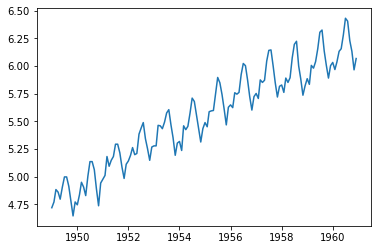

In [20]:
ts_log = np.log(ts2)
plt.plot(ts_log)

In [21]:
augmented_dickey_fuller_test(ts_log)

Results of Dickey-Fuller Test:
Test Statistic                  -1.717017
p-value                          0.422367
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


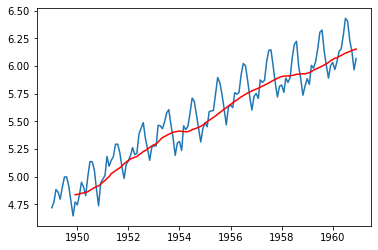

In [22]:
moving_avg = ts_log.rolling(window=12).mean()  # moving average구하기 
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [23]:
ts_log_moving_avg = ts_log - moving_avg # 변화량 제거
ts_log_moving_avg.head(15)

Month
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01         NaN
1949-08-01         NaN
1949-09-01         NaN
1949-10-01         NaN
1949-11-01         NaN
1949-12-01   -0.065494
1950-01-01   -0.093449
1950-02-01   -0.007566
1950-03-01    0.099416
Name: Passengers, dtype: float64

In [24]:
ts_log_moving_avg.dropna(inplace=True)
ts_log_moving_avg.head(15)

Month
1949-12-01   -0.065494
1950-01-01   -0.093449
1950-02-01   -0.007566
1950-03-01    0.099416
1950-04-01    0.052142
1950-05-01   -0.027529
1950-06-01    0.139881
1950-07-01    0.260184
1950-08-01    0.248635
1950-09-01    0.162937
1950-10-01   -0.018578
1950-11-01   -0.180379
1950-12-01    0.010818
1951-01-01    0.026593
1951-02-01    0.045965
Name: Passengers, dtype: float64

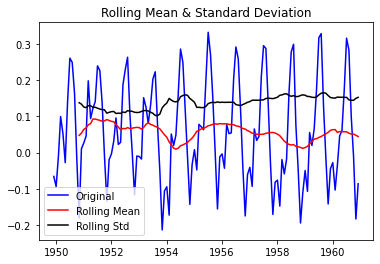

In [25]:
plot_rolling_statistics(ts_log_moving_avg)

In [26]:
augmented_dickey_fuller_test(ts_log_moving_avg)

Results of Dickey-Fuller Test:
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


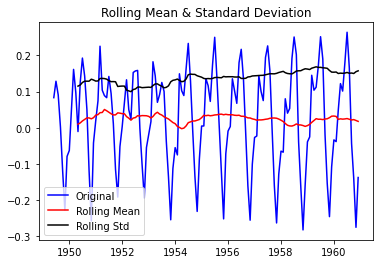

In [28]:
moving_avg_6 = ts_log.rolling(window=6).mean()
ts_log_moving_avg_6 = ts_log - moving_avg_6
ts_log_moving_avg_6.dropna(inplace=True)

plot_rolling_statistics(ts_log_moving_avg_6)

In [29]:
augmented_dickey_fuller_test(ts_log_moving_avg_6)

Results of Dickey-Fuller Test:
Test Statistic                  -2.273822
p-value                          0.180550
#Lags Used                      14.000000
Number of Observations Used    124.000000
Critical Value (1%)             -3.484220
Critical Value (5%)             -2.885145
Critical Value (10%)            -2.579359
dtype: float64



시게열을 이해하는데, 추세(Trend)와 계절성(Seasonality) 같은 단어를 더 정확하게 정의해야 좋다.

- 추세는 선형적이지 않을 때가 있다. 증가에서 감소 감소에서 증가로 변화되면, 방향이 변화했다고 한다.
- 계절성은 항상 일정한 빈도의 형태로 나타난다.
- 주기성(cycle)은 고정된 빈도가 아닌 형태로 증가나 감소하는 모습을 보입니다.

Trend에는 잡히지 않지만, 시계열 데이터 안에 파악되지 않은 주기적인 변화는 이동평균값 제거로 상쇄되지 않는다. 이러한 계절적 주기적 패턴을 계절성이라 한다.

계절성 패턴을 상쇄하기 위해 효과적인 방법에는 차분(Differencing)이 있다.

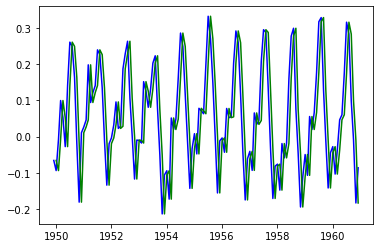

In [30]:
ts_log_moving_avg_shift = ts_log_moving_avg.shift()

plt.plot(ts_log_moving_avg, color='blue')
plt.plot(ts_log_moving_avg_shift, color='green')

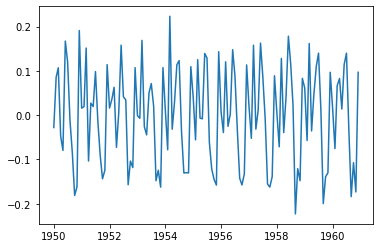

In [31]:
ts_log_moving_avg_diff = ts_log_moving_avg - ts_log_moving_avg_shift
ts_log_moving_avg_diff.dropna(inplace=True)
plt.plot(ts_log_moving_avg_diff)

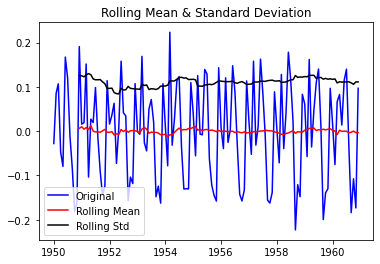

In [32]:
plot_rolling_statistics(ts_log_moving_avg_diff)

In [34]:
augmented_dickey_fuller_test(ts_log_moving_avg_diff)

Results of Dickey-Fuller Test:
Test Statistic                  -3.912981
p-value                          0.001941
#Lags Used                      13.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64


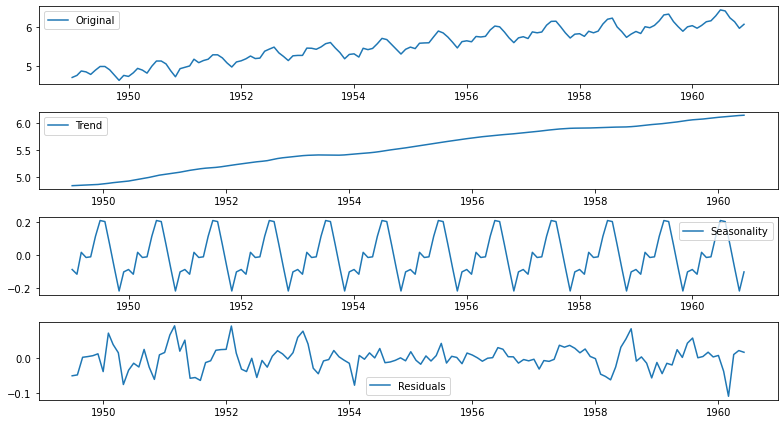

In [36]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend # 추세(시간 추이에 따라 나타나는 평균값 변화 )
seasonal = decomposition.seasonal # 계절성(패턴이 파악되지 않은 주기적 변화)
residual = decomposition.resid # 원본(로그변환한) - 추세 - 계절성

plt.rcParams["figure.figsize"] = (11,6)
plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

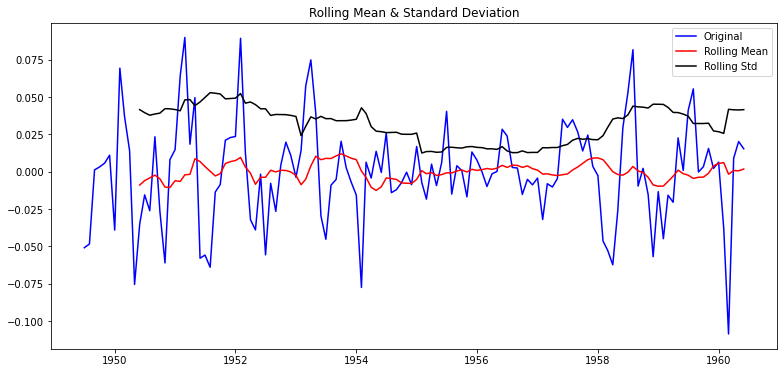

In [37]:
plt.rcParams["figure.figsize"] = (13,6)
plot_rolling_statistics(residual)

In [38]:
residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

Results of Dickey-Fuller Test:
Test Statistic                -6.332387e+00
p-value                        2.885059e-08
#Lags Used                     9.000000e+00
Number of Observations Used    1.220000e+02
Critical Value (1%)           -3.485122e+00
Critical Value (5%)           -2.885538e+00
Critical Value (10%)          -2.579569e+00
dtype: float64


ADF평가를 통해서, 시계열 데이터에서 추세(이동평균)과 계절성(차분)을 제거하면서 안정적 데이터를 얻어보았다.

ARIMA(Autoregressive Interrated Moving Average)를 사용하면 이 원리를 이용해 시계열 예측 모델을 자동으로 만들 수 있다.

1. AR (자기회귀, Autoregressive)
- 과거 값들에 대한 회귀분석으로 미래 값을 예측하는 방법
- Y_t가 이전 p개의 데이터의 가중합으로 수렴한다고 보는 모델

- AR은 시계열의 Residual에 해당하는 부분을 모델링한다.
- 가중치의 크기가 1보다 작은 Y_(t-1), Y_(t-2),...,Y_(t-p)의 가중합으로 수렴하는 자기회귀 모델과 안정적 시계열은 통계학적으로 동치입니다.
- 주식값이 항상 일정한 균형 수준을 유지할 것이라고 예측하는 관점이 바로 주식 시계열을 AR로 모델링하는 관점이라고 볼 수 있다.

2. MA(이동평균, Moving Average)
- MA는 Y_t가 이전 q개의 예측 오차값 e_(t-1),...,e_(t-q)의 가중합으로 수렴한다고 보는 모델입니다.

- MA는 시계열의 추세에 해당하는 부분을 모델링한다고 볼 수 있다.
- 예측 오차값 e_(t-1)이 0보다 크면 모델 예측보다 관측값이 더 높다는 뜻으로 다음 Y_t 예측 시에는 예측치를 올려잡는다.

3. I(차분 누적, Integration)
- I는 Y_t의 이전데이터와 d차 차분의 누적 합이라고 보는 모델이다.

- I는 시계열의 계절성에 해당하는 부분을 모델링한다
- 예를 들어 d = 1이라면, Y_t는 Y_(t-1)과 delta(Y_(t-1))의 합이라고 본다.

아리마는 위 3가지 모델을 한꺼번에 고려한다.

ARIMA를 효과적으로 활용하기 위해서는 모수(parameter)를 잘 설정해야한다.

p : 자기회귀 모형(AR)의 시차
d : 차분 누적(I) 횟수
q : 이동평균 모형(MA)의 시차

일반적인 시계열 데이터는 AR이나 MA 중 하나만 가지는 경향이 있기에, p + q < 2, p * q = 0

p,d,q를 선택하는 대표적인 방법
- ACF(Autocorrelation Function)
AutoCorrelation란 자기 상관계수와 같다.

  - 시차(lag)에 따른 관측치들 사이의 관련성을 측정하는 함수
  - 주어진 시계열의 현재 값이 과거(y_(t-1),...,y_(t-n))값과 어떻게 상관되는지 설명함
  - ACF plot에서 X축은 상관계수를 나타냄, y축은 시차 수를 나타냄

- PACF(Partial Autocorrelation Function)
  - 다른 관측치의 영향력을 배제하고 두 시차의 관측치 간 관련성을 측정하는 함수
  - k 이외의 모든 시차를 갖는 관측치(y_(t-1),...y_(t-k+1))의 영향력을 배제한 가운데 특정 두 관측치, y_t와 y_(t-k)가 얼마나 관련 있는지 나타내는 척도